# Smoker Detector

1. Project Goal
To create an automated system that can analyze image data (photographs of people) and determine the presence of smoking behavior. This is often used in health research, security monitoring, or automated content moderation.


In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [15]:
!kaggle datasets download -d sujaykapadnis/smoking


Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/smoking
License(s): Attribution 4.0 International (CC BY 4.0)
smoking.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import zipfile
zip_ref = zipfile.ZipFile('/content/smoking.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
# --- COLAB VERSION ---
import os

# 1. Point to where you uploaded your data
# If you uploaded a zip and unzipped it, find that path in the folder icon on the left
train_dir = "/content/Training/Training"
test_dir = "/content/Testing/Testing"

# 2. Change the 'working' directory to Colab's default
temp_dir = "/content/working_data" # This replaces /kaggle/working/

# 3. Create the directories
temp_train_dir = os.path.join(temp_dir, 'training')
temp_test_dir = os.path.join(temp_dir, 'testing')

os.makedirs(temp_train_dir + '/smoking', exist_ok=True)
os.makedirs(temp_train_dir + '/notsmoking', exist_ok=True)
os.makedirs(temp_test_dir + '/smoking', exist_ok=True)
os.makedirs(temp_test_dir + '/notsmoking', exist_ok=True)

In [18]:
import shutil

In [19]:
def copy_files(srcpath,destpath):
    print("Copying Files.....")
    for filename in os.listdir(srcpath):
        full_src_path = os.path.join(srcpath,filename)
        if "notsmoking" in filename:
            shutil.copy(full_src_path,destpath + '/notsmoking')
        else:
            shutil.copy(full_src_path,destpath + '/smoking')
    print("Files copied!")

In [20]:
copy_files(train_dir,temp_train_dir)
copy_files(test_dir,temp_test_dir)

Copying Files.....
Files copied!
Copying Files.....
Files copied!


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input,Rescaling,RandomZoom,Resizing,RandomCrop,RandomRotation,RandomFlip
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
train_ds = image_dataset_from_directory(
    temp_train_dir,
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    labels='inferred',
    label_mode = 'binary'
)

Found 716 files belonging to 2 classes.


In [23]:
test_ds = image_dataset_from_directory(
    temp_test_dir,
    batch_size=32,
    image_size=(256,256),
    shuffle=False,
    labels='inferred',
    label_mode='binary'
)

Found 224 files belonging to 2 classes.


In [24]:
class_names = train_ds.class_names
class_names

['notsmoking', 'smoking']

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Rescaling, RandomFlip, RandomRotation

model = Sequential([
    Input(shape=(256, 256, 3)),
    Rescaling(1./255),

    # Simpler Augmentation (No RandomCrop)
    RandomFlip("horizontal"),
    RandomRotation(0.1),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Flatten(), # This is where the error was happening(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Increased dropout to help the model learn better features
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Slower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
# model = Sequential([
#     Input(shape=(256,256,3)),
#     Rescaling(1./255),
#     RandomZoom(0.2),
#     RandomRotation(0.2),
#     RandomFlip('horizontal_and_vertical'),
#     RandomCrop(100,100),
#     Resizing(256,256),


#     Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'),
#     MaxPooling2D(pool_size=(2,2)),

#     Flatten(),
#     Dense(256,activation='relu'),
#     Dense(128,activation='relu'),
#     Dropout(0.2),
#     Dense(len(class_names)-1,activation='sigmoid')
# ])

# model.compile(
#     optimizer = tensorflow.keras.optimizers.Adam(),
#     loss = tensorflow.keras.losses.BinaryCrossentropy(),
#     metrics = ['accuracy']
# )

# model.summary()

In [27]:
epochs = 40
history = model.fit(
    train_ds,
    epochs = epochs,
    validation_data = test_ds
)

Epoch 1/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.5113 - loss: 0.7210 - val_accuracy: 0.7098 - val_loss: 0.6238
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6867 - loss: 0.6086 - val_accuracy: 0.6696 - val_loss: 0.5959
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6856 - loss: 0.5650 - val_accuracy: 0.7321 - val_loss: 0.5694
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6910 - loss: 0.5547 - val_accuracy: 0.7366 - val_loss: 0.5603
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.7259 - loss: 0.5440 - val_accuracy: 0.7366 - val_loss: 0.5537
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.7067 - loss: 0.5531 - val_accuracy: 0.7277 - val_loss: 0.5612
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7033 - loss: 0.5603 - val_accuracy: 0.7232 - val_loss: 0.5412
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7198 - loss: 0.5355 - val_accuracy: 0.7366 

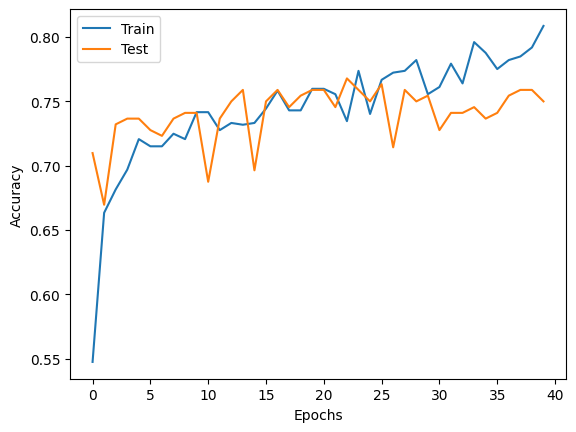

In [28]:
plt.plot(range(epochs),history.history['accuracy'])
plt.plot(range(epochs),history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])

In [29]:
loss,accuracy = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7355 - loss: 0.5360


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
y_true = []
for x,y in test_ds:
    #print(y.numpy().astype('int'))
    y_true.append(y.numpy().astype('int'))
y_true = np.array(y_true).flatten()
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [32]:
y_pred = model.predict(test_ds)
y_pred = np.where(y_pred>0.5,1,0)
y_pred = np.array(y_pred).flatten()
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

In [33]:
print(classification_report(y_true,y_pred,target_names=class_names))


              precision    recall  f1-score   support

  notsmoking       0.74      0.77      0.75       112
     smoking       0.76      0.73      0.75       112

    accuracy                           0.75       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.75      0.75      0.75       224



In [34]:
# Check how many of each class are in your training set
smoking_count = len(os.listdir(temp_train_dir + '/smoking'))
notsmoking_count = len(os.listdir(temp_train_dir + '/notsmoking'))
print(f"Smoking: {smoking_count}, Not Smoking: {notsmoking_count}")

# Check the first 5 predictions on the test set
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    print("Raw Probabilities:", preds[:5])
    print("Actual Labels:     ", labels[:5])

Smoking: 358, Not Smoking: 358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Raw Probabilities: [[0.46363094]
 [0.6802786 ]
 [0.7326107 ]
 [0.8852583 ]
 [0.07805623]]
Actual Labels:      tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


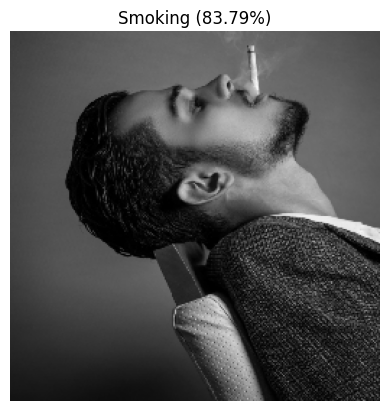

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_smoking(img_path):
    # FORCE 256x256 to match the Input layer exactly
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    probability = prediction[0][0]

    # Class Names logic
    if probability > 0.5:
        label = "Smoking"
        conf = probability
    else:
        label = "Not Smoking"
        conf = 1 - probability

    plt.imshow(img)
    plt.title(f"{label} ({conf*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Test it
predict_smoking('/content/Screenshot 2026-01-22 115029.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


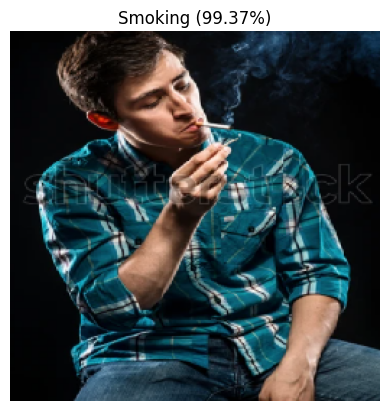

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_smoking(img_path):
    # FORCE 256x256 to match the Input layer exactly
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    probability = prediction[0][0]

    # Class Names logic
    if probability > 0.5:
        label = "Smoking"
        conf = probability
    else:
        label = "Not Smoking"
        conf = 1 - probability

    plt.imshow(img)
    plt.title(f"{label} ({conf*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Test it
predict_smoking('/content/Screenshot 2026-01-22 120436.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


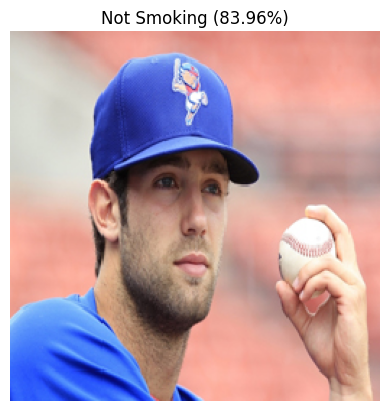

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_smoking(img_path):
    # FORCE 256x256 to match the Input layer exactly
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    probability = prediction[0][0]

    # Class Names logic
    if probability > 0.5:
        label = "Smoking"
        conf = probability
    else:
        label = "Not Smoking"
        conf = 1 - probability

    plt.imshow(img)
    plt.title(f"{label} ({conf*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Test it
predict_smoking('/content/Training/Training/notsmoking_0001.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


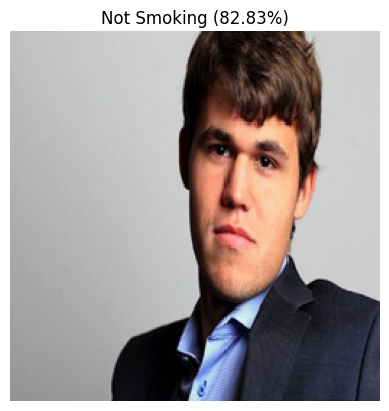

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_smoking(img_path):
    # FORCE 256x256 to match the Input layer exactly
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    probability = prediction[0][0]

    # Class Names logic
    if probability > 0.5:
        label = "Smoking"
        conf = probability
    else:
        label = "Not Smoking"
        conf = 1 - probability

    plt.imshow(img)
    plt.title(f"{label} ({conf*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Test it
predict_smoking('/content/Validation/Validation/notsmoking_0024.jpg')

In [40]:
# Hence our model is working very well